# Basic Recommendation System - MovieLens

Python implementation of a basic recommendation system.

Recommends movies based on the correlations between the ratings for each movie.

Used the MovieLens dataset from https://grouplens.org/datasets/movielens/

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('RdBu')

%matplotlib inline

In [25]:
# Create a list of column names
column_names = 'user_id item_id rating timestamp'.split()

In [26]:
# Read in the ratings data and check first 5 rows
df = pd.read_csv('data/u.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [27]:
# Read in the movie titles data and check first 5 rows
movie_titles = pd.read_csv('data/Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [28]:
# JOIN the two tables on item_id
df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [29]:
# Show the top 10 best rated movies
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [30]:
# Show the top 10 most frequently rated movies
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [35]:
# Create a data frame that includes both info from above
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['rating_freq'] = pd.DataFrame(df.groupby('title')['rating'].count())

# Check the first 5 rows
ratings.head()

,rating,rating_freq
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


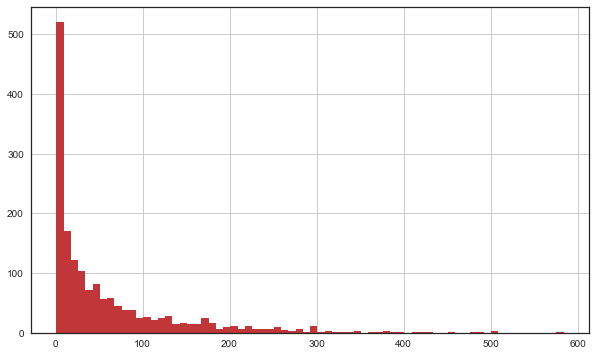

In [72]:
# Distribution of the number of ratings
ratings['rating_freq'].hist(bins=70, figsize=(10,6))

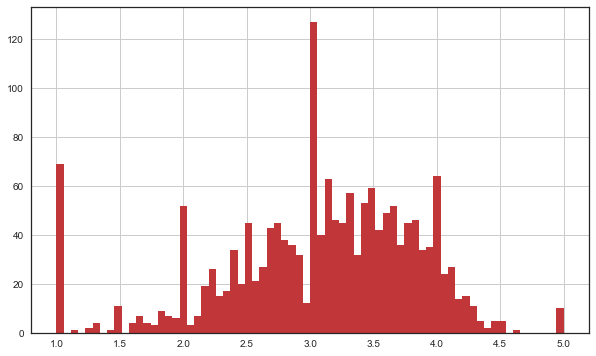

In [73]:
# Distribution of the ratings
ratings['rating'].hist(bins=70, figsize=(10,6))

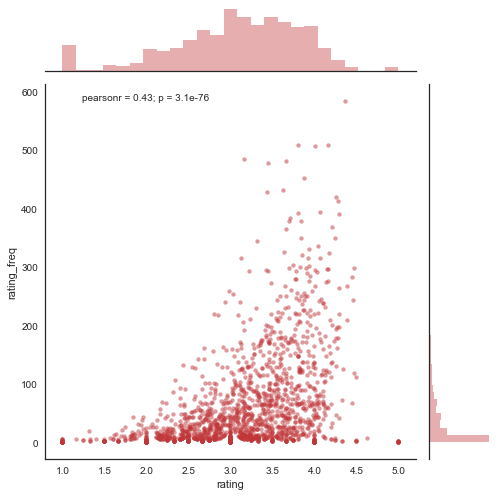

In [85]:
# Relationship between rating value vs rating frequeny
sns.jointplot(x='rating', y='rating_freq', data=ratings, alpha=0.5, size=7, joint_kws={'s':15})

In [42]:
# Pivot the dataset into a matrix
movie_mat = df.pivot_table(index='user_id', columns='title', values='rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Show the Top 10 most popular movies again
ratings.sort_values('rating_freq', ascending=False).head(10)

,rating,rating_freq
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [44]:
# Pick 2 movies, Star Wars (1977) and Toy Story (1995)
starwars_ratings = movie_mat['Star Wars (1977)']
toystory_ratings = movie_mat['Toy Story (1995)']

In [48]:
# For each movie, compute correlation with other movies
similar_starwars = movie_mat.corrwith(starwars_ratings)
similar_toystory = movie_mat.corrwith(toystory_ratings)

C:\Users\munky\Anaconda\lib\site-packages\numpy\lib\function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\munky\Anaconda\lib\site-packages\numpy\lib\function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [49]:
# Create a dataframe with the starwars correlations
corr_starwars = pd.DataFrame(similar_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [51]:
# Sort the dataframe and show first 10 rows
corr_starwars.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


The reason why some random movies show perfect correlation with Star Wars is most likely because each of these movies only had one rating, and the user who each move also happened to give the same rating to Star Wars.

One possible solution to this problem is to only consider the movies with more than, say, 50 ratings. The speicific threshhold could be adjusted.

In [52]:
# Attach the rating frequency column to the correlation dataframe
corr_starwars = corr_starwars.join(ratings['rating_freq'])
corr_starwars.head()

,Correlation,rating_freq
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [57]:
# Filter only the movies with more than 100 ratings
corr_starwars[corr_starwars['rating_freq'] > 50].sort_values('Correlation', ascending=False).head(10)

,Correlation,rating_freq
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
"Life Less Ordinary, A (1997)",0.411638,53
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331


This time, the result makes much more sense. The Star Wars (1977) movie has the highest correlation with other movies in the same movie series.

Let's try the same process with the Toy Story (1995) movie.

In [64]:
# Create a dataframe with the toystory correlations
corr_toystory = pd.DataFrame(similar_toystory, columns=['Correlation'])
corr_toystory.dropna(inplace=True)

# Sort the dataframe by correlation
corr_toystory.sort_values('Correlation', ascending=False)

# Attach the rating frequency column to the correlation dataframe
corr_toystory = corr_toystory.join(ratings['rating_freq'])

# Filter only the movies with more than 100 ratings
corr_toystory[corr_toystory['rating_freq'] > 50].sort_values('Correlation', ascending=False).head(10)

,Correlation,rating_freq
title,,
Toy Story (1995),1.000000,452
Raise the Red Lantern (1991),0.641535,58
Flubber (1997),0.558389,53
"Jackal, The (1997)",0.557876,87
"Craft, The (1996)",0.549100,104
"Island of Dr. Moreau, The (1996)",0.490491,57
Notorious (1946),0.486031,52
Cyrano de Bergerac (1990),0.480052,66
"Beautician and the Beast, The (1997)",0.466064,86
